# MACHINE LEARNING COM SCIKIT-LEARN

#### Prevendo o salário de uma pessoa com base no seu tempo dedicado aos estudos (horas por mês)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('dataset.csv')

In [17]:
df.shape

(500, 2)

In [18]:
df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [19]:
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


ANÁLISE EXPLORATÓRIA


In [21]:
df.isnull().sum()

,0
horas_estudo_mes,0
salario,0


In [22]:
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [23]:
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [24]:
df['horas_estudo_mes'].describe()

,horas_estudo_mes
count,500.000000
mean,50.060000
std,14.659406
min,1.000000
25%,39.750000
50%,50.000000
75%,60.000000
max,100.000000


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

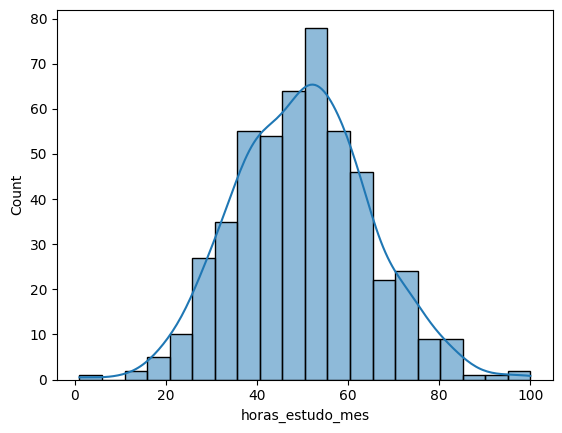

In [25]:
sns.histplot(data = df, x = 'horas_estudo_mes', kde = True)

In [26]:
x = np.array(df['horas_estudo_mes'])

In [27]:
type(x)

numpy.ndarray

In [28]:
x = x.reshape(-1, 1)

In [29]:
y = df['salario']

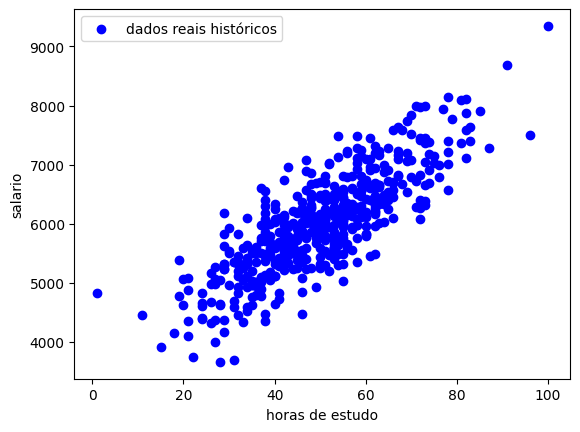

In [30]:
plt.scatter(x, y, color = "blue", label = 'dados reais históricos')
plt.xlabel('horas de estudo')
plt.ylabel('salario')
plt.legend()
plt.show()

In [31]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [32]:
x_treino.shape

(400, 1)

In [33]:
modelo = LinearRegression()
modelo.fit(x_treino, y_treino)

LinearRegression()

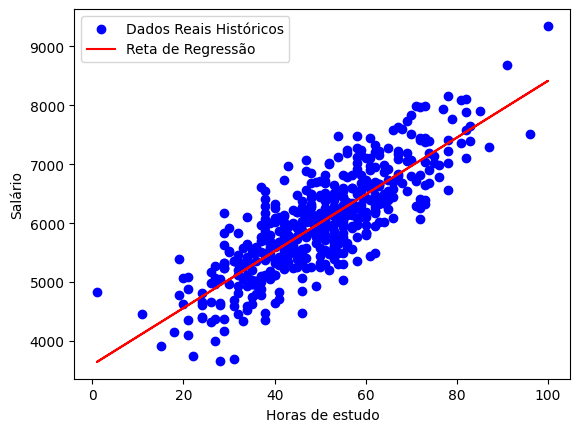

In [34]:
plt.scatter(x, y, color = "blue", label = "Dados Reais Históricos")
plt.plot(x, modelo.predict(x), color = "red", label = "Reta de Regressão")
plt.xlabel("Horas de estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [35]:
score = modelo.score(x_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


In [36]:
modelo.intercept_

3596.7837243727545

In [37]:
'''
#entendendo o intercept com outro exemplo simples
X = np.array([[1], [2], [3], [4], [5]])  # Variável independente
y = np.array([2, 3, 5, 7, 11])            # Variável dependente

# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Acessando o intercepto
intercepto = modelo.intercept_
print(f"O intercepto é: {intercepto}")
'''

'\n#entendendo o intercept com outro exemplo simples\nX = np.array([[1], [2], [3], [4], [5]])  # Variável independente\ny = np.array([2, 3, 5, 7, 11])            # Variável dependente\n\n# Criando e treinando o modelo\nmodelo = LinearRegression()\nmodelo.fit(X, y)\n\n# Acessando o intercepto\nintercepto = modelo.intercept_\nprint(f"O intercepto é: {intercepto}")\n'

In [38]:
modelo.coef_

array([48.18185277])

DEPLOY DO MODELO

In [39]:
for i in range(30, 100):
  horas_estudo_novo = np.array([[i]])
  salario_previsto = modelo.predict(horas_estudo_novo)
  print("se voce estudar cerca de ", horas_estudo_novo, "horas pos mês, seu salário pode chegar a", salario_previsto)

se voce estudar cerca de  [[30]] horas pos mês, seu salário pode chegar a [5042.23930752]
se voce estudar cerca de  [[31]] horas pos mês, seu salário pode chegar a [5090.42116029]
se voce estudar cerca de  [[32]] horas pos mês, seu salário pode chegar a [5138.60301306]
se voce estudar cerca de  [[33]] horas pos mês, seu salário pode chegar a [5186.78486583]
se voce estudar cerca de  [[34]] horas pos mês, seu salário pode chegar a [5234.9667186]
se voce estudar cerca de  [[35]] horas pos mês, seu salário pode chegar a [5283.14857137]
se voce estudar cerca de  [[36]] horas pos mês, seu salário pode chegar a [5331.33042414]
se voce estudar cerca de  [[37]] horas pos mês, seu salário pode chegar a [5379.51227692]
se voce estudar cerca de  [[38]] horas pos mês, seu salário pode chegar a [5427.69412969]
se voce estudar cerca de  [[39]] horas pos mês, seu salário pode chegar a [5475.87598246]
se voce estudar cerca de  [[40]] horas pos mês, seu salário pode chegar a [5524.05783523]
se voce est